# Bank Loan Case Study

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [3]:
#Importing files
Application_Data = pd.read_csv("application_data.csv")
Previous_Application = pd.read_csv("previous_application.csv")

In [4]:
Application_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
Previous_Application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Database Dimension
print("The dimension of Application_data:",Application_Data.shape)
print("The dimension of Previous_Application:",Previous_Application.shape)

The dimension of Application_data: (236015, 122)
The dimension of Previous_Application: (1670214, 37)


In [7]:
#Database size
print("The size of Application_data:",Application_Data.size)
print("The size of Previous_Application:",Previous_Application.size)

The size of Application_data: 28793830
The size of Previous_Application: 61797918


In [8]:
#Column types
Application_Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236015 entries, 0 to 236014
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
Previous_Application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
#Numeric Variables 
Application_Data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,236015.000000,236015.000000,236015.000000,2.360150e+05,2.360150e+05,236005.000000,2.358200e+05,236015.000000,236015.000000,236015.000000,...,236015.000000,236015.000000,236015.000000,236015.000000,204084.000000,204084.000000,204084.000000,204084.000000,204084.00000,204084.000000
mean,236810.087795,0.081050,0.416829,1.688216e+05,5.989585e+05,27117.545976,5.383243e+05,0.020856,-16034.549774,63793.129581,...,0.008021,0.000589,0.000479,0.000335,0.006541,0.007036,0.034334,0.266822,0.26470,1.895783
std,78933.492654,0.272912,0.722266,2.636859e+05,4.021289e+05,14505.968888,3.691604e+05,0.013821,4370.464212,141256.492134,...,0.089199,0.024261,0.021876,0.018292,0.085396,0.112172,0.205690,0.913513,0.61147,1.867484
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17546.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,168387.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16537.500000,2.385000e+05,0.010006,-19684.000000,-2762.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,236840.000000,0.000000,0.000000,1.440000e+05,5.135310e+05,24916.500000,4.500000e+05,0.018850,-15747.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,305122.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34627.500000,6.795000e+05,0.028663,-12402.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,373372.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,24.000000,8.00000,25.000000


In [11]:
Previous_Application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# 2. Data Cleaning and Manipulation #

##### A. Application_Data Missing Values( & Dropping  It)

In [12]:
# Percentage of null values in each column of Application_Data
round(Application_Data.isnull().sum() / Application_Data.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13.53
AMT_REQ_CREDIT_BUREAU_WEEK    13.53
AMT_REQ_CREDIT_BUREAU_MON     13.53
AMT_REQ_CREDIT_BUREAU_QRT     13.53
AMT_REQ_CREDIT_BUREAU_YEAR    13.53
Length: 122, dtype: float64

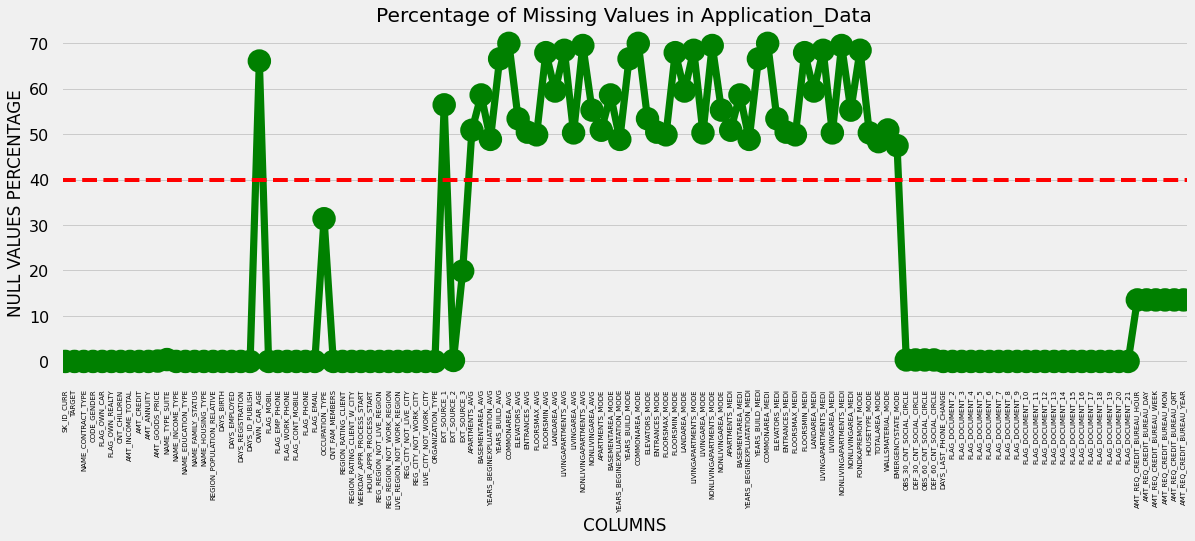

In [13]:
#Plotting 
null_Application = pd.DataFrame((Application_Data.isnull().sum())*100/Application_Data.shape[0]).reset_index()
null_Application.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_Application, color='green')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Application_Data")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

##### From the above graph it is evident that there are many columns with the missing values percentage greater than 40%. Since 40% is a significant number for missing values in the dataset, we can drop these columns. 

In [14]:
#Checking the columns which have more than 40% missing values
appli_data_null_40 = null_Application[null_Application["Null Values Percentage"]>=40]
appli_data_null_40

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,66.044531
41,EXT_SOURCE_1,56.415482
44,APARTMENTS_AVG,50.828973
45,BASEMENTAREA_AVG,58.592039
46,YEARS_BEGINEXPLUATATION_AVG,48.819355
47,YEARS_BUILD_AVG,66.528822
48,COMMONAREA_AVG,69.937080
49,ELEVATORS_AVG,53.361015
50,ENTRANCES_AVG,50.409084
51,FLOORSMAX_AVG,49.815902


In [15]:
print('Number of Columns that have missing values greater than 40% :', len(appli_data_null_40))

Number of Columns that have missing values greater than 40% : 49


***Insights: Most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant.***

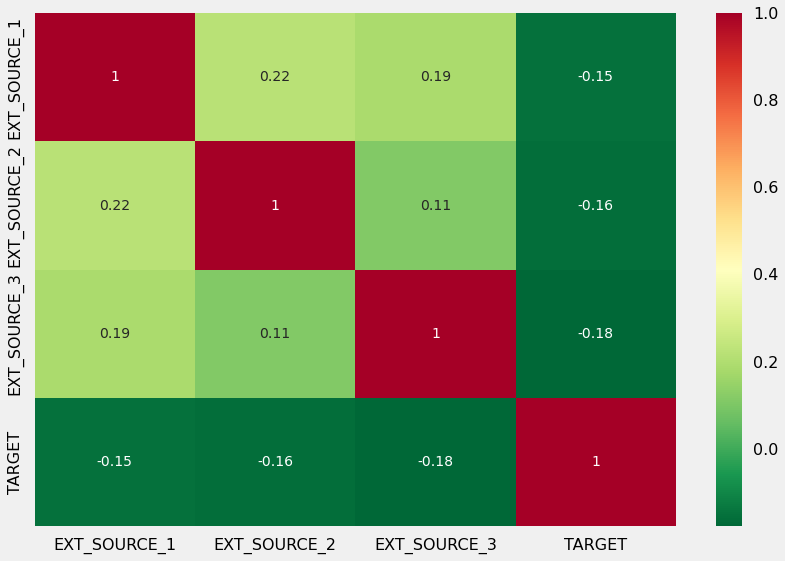

In [16]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = Application_Data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn_r")

***Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and the target column, thus we can drop these columns.***

In [17]:
# create a list of columns that needs to be dropped including the columns with > 40% null values
New_Application = appli_data_null_40["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 

# as EXT_SOURCE_1 column is already included in appli_data_null_40 
len(New_Application)

51

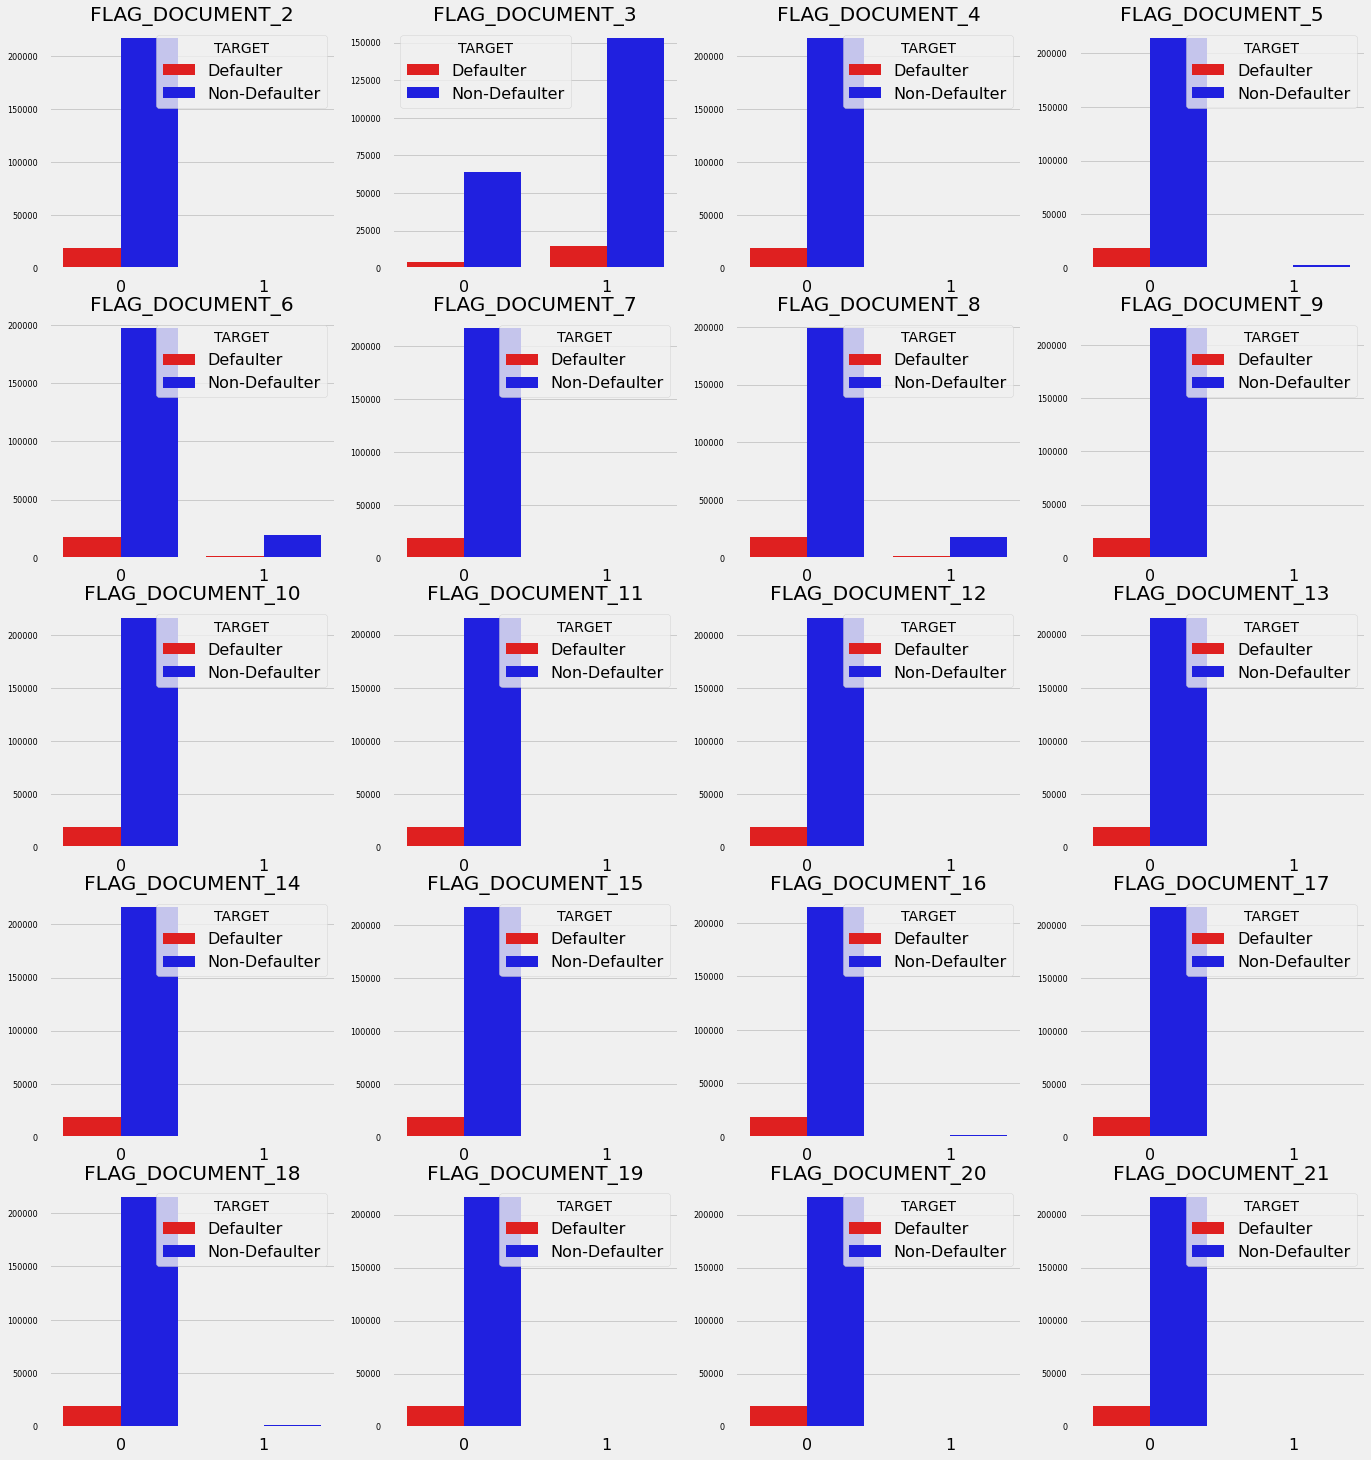

In [18]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
flag_col = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = Application_Data[flag_col+["TARGET"]]

length = len(flag_col)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Non-Defaulter"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_col,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

***Insight: The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.***

In [19]:
# Adding the flag documents for dropping the columns
flag_col.remove('FLAG_DOCUMENT_3') 
New_Application = New_Application + flag_col
len(New_Application)

70

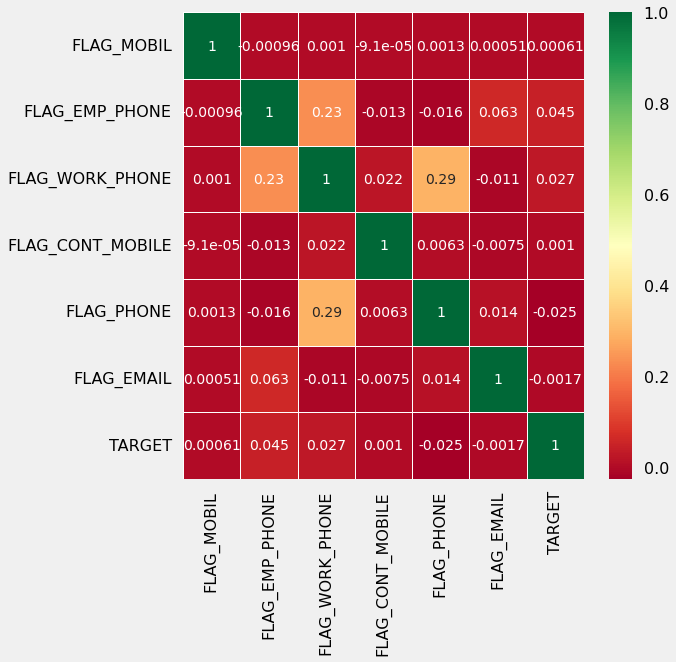

In [20]:
# Checking the correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = Application_Data[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=0.5)

***Insight: There is almost no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be dropped.*** 

In [21]:
# Adding the 6 FLAG columns to be dropped
contact_col.remove('TARGET') 
New_Application = New_Application + contact_col
len(New_Application)

76

Total 76 columns can be dropped from Application_Data 

In [22]:
# Dropping the unnecessary columns from Application_Data
Application_Data.drop(labels=New_Application,axis=1,inplace=True)

In [23]:
#Verifying the shape of the dataframe 
print('New Shape of the Dataframe: ',Application_Data.shape)

New Shape of the Dataframe:  (236015, 46)


In [24]:
# Describing the dataset and observing the changes
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236015 entries, 0 to 236014
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   236015 non-null  int64  
 1   TARGET                       236015 non-null  int64  
 2   NAME_CONTRACT_TYPE           236015 non-null  object 
 3   CODE_GENDER                  236015 non-null  object 
 4   FLAG_OWN_CAR                 236015 non-null  object 
 5   FLAG_OWN_REALTY              236015 non-null  object 
 6   CNT_CHILDREN                 236015 non-null  int64  
 7   AMT_INCOME_TOTAL             236015 non-null  float64
 8   AMT_CREDIT                   236015 non-null  float64
 9   AMT_ANNUITY                  236005 non-null  float64
 10  AMT_GOODS_PRICE              235820 non-null  float64
 11  NAME_TYPE_SUITE              235043 non-null  object 
 12  NAME_INCOME_TYPE             236015 non-null  object 
 13 

##### B. Previous_Application Missing Values ( & Dropping It)

In [25]:
# Percentage of null values in each column of Previous_Application
round(Previous_Application.isnull().sum() / Previous_Application.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

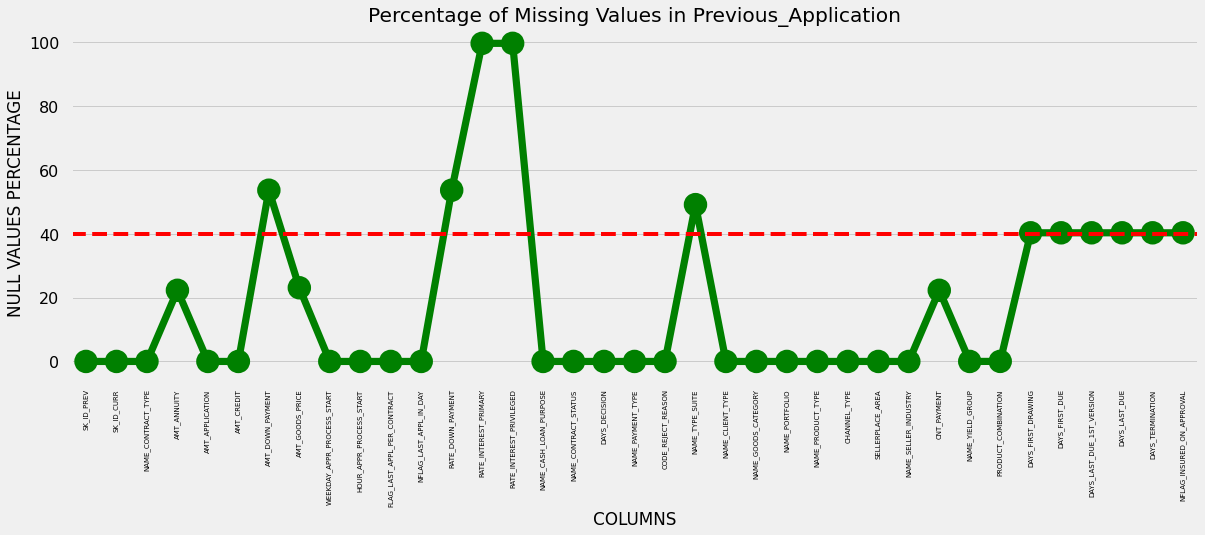

In [26]:
#Plotting in a Graph
null_Previous = pd.DataFrame((Previous_Application.isnull().sum())*100/Previous_Application.shape[0]).reset_index()
null_Previous.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_Previous, color='green')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing Values in Previous_Application")
plt.ylabel("NULL VALUES PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

***From the above graph it is evident that there are many columns with the missing values percentage greater than 40%. Since 40% is a significant number for missing values in the dataset, we can drop these columns.***

In [27]:
#Checking the columns which have more than 40% missing values
prev_app_null_40 = null_Previous[null_Previous["Null Values Percentage"]>=40]
prev_app_null_40

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [28]:
print('Number of Columns that have missing values greater than 40% :', len(prev_app_null_40))

Number of Columns that have missing values greater than 40% : 11


***Before dropping these columns, let's review if there are more columns which can be dropped or not.***

In [29]:
# Listing down the columns which are not needed for the analysis
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [30]:
# Getting the 11 columns which has more than 40% unknown
New_Previous = prev_app_null_40["Column Name"].tolist()
New_Previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [31]:
New_Previous = New_Previous + Unnecessary_previous
len(New_Previous)

15

In [32]:
# Dropping columns from Previous_Application
Previous_Application.drop(labels=New_Previous,axis=1,inplace=True)

In [33]:
#Verifying the shape of the dataframe 
print('New Shape of the Dataframe: ',Previous_Application.shape)

New Shape of the Dataframe:  (1670214, 22)


In [34]:
# Describing the dataset and observing the changes
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [35]:
# Converting Negative days to Positive days as days cannot be negative

days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in days_col:
    Application_Data[col] = abs(Application_Data[col])

In [36]:
# Binning Numerical Columns to create a Categorical Column

# Creating bins for income amount
Application_Data['AMT_INCOME_TOTAL'] = Application_Data['AMT_INCOME_TOTAL'] / 100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

Application_Data['AMT_INCOME_RANGE'] = pd.cut(Application_Data['AMT_INCOME_TOTAL'], bins, labels=slot)

In [37]:
Application_Data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.766217
200k-300k    21.173792
0-100K       20.752733
300k-400k     4.765216
400k-500k     1.743175
500k-600k     0.346854
600k-700k     0.282402
800k-900k     0.100494
700k-800k     0.055124
900k-1M       0.008481
1M Above      0.005512
Name: AMT_INCOME_RANGE, dtype: float64

***Insight: More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K.***

In [38]:
# Creating bins for Credit amount
Application_Data['AMT_CREDIT'] = Application_Data['AMT_CREDIT'] / 100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

Application_Data['AMT_CREDIT_RANGE'] = pd.cut(Application_Data['AMT_CREDIT'], bins=bins, labels=slots)

In [39]:
Application_Data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.828528
1M Above     16.261255
500k-600k    11.092092
400k-500k    10.445946
100K-200K     9.786242
300k-400k     8.586742
600k-700k     7.792725
800k-900k     7.119039
700k-800k     6.224181
900k-1M       2.905324
0-100K        1.957926
Name: AMT_CREDIT_RANGE, dtype: float64

***Insight: More Than 16% loan applicants have taken loan above 1M.***

In [40]:
# Creating bins for Age
Application_Data['AGE'] = Application_Data['DAYS_BIRTH'] // 365

bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

Application_Data['AGE_GROUP']=pd.cut(Application_Data['AGE'], bins=bins, labels=slots)

In [41]:
Application_Data['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604347
30-40       26.980489
40-50       24.150584
20-30       17.264157
0-20         0.000424
Name: AGE_GROUP, dtype: float64

***Insight: 31% loan applicants have 50+ years. More than 55% of loan applicants have 40+ years.*** 

In [42]:
# Creating bins for Employement Time
Application_Data['YEARS_EMPLOYED'] = Application_Data['DAYS_EMPLOYED'] // 365

bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

Application_Data['EMPLOYMENT_YEAR']=pd.cut(Application_Data['YEARS_EMPLOYED'], bins=bins, labels=slots)

In [43]:
Application_Data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.546383
5-10        25.034302
10-20       14.537453
20-30        3.744680
30-40        1.065673
40-50        0.071510
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

***Insight: More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience.***

In [44]:
# inspecting the column types if they are in correct data type using the above result.
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236015 entries, 0 to 236014
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   236015 non-null  int64   
 1   TARGET                       236015 non-null  int64   
 2   NAME_CONTRACT_TYPE           236015 non-null  object  
 3   CODE_GENDER                  236015 non-null  object  
 4   FLAG_OWN_CAR                 236015 non-null  object  
 5   FLAG_OWN_REALTY              236015 non-null  object  
 6   CNT_CHILDREN                 236015 non-null  int64   
 7   AMT_INCOME_TOTAL             236015 non-null  float64 
 8   AMT_CREDIT                   236015 non-null  float64 
 9   AMT_ANNUITY                  236005 non-null  float64 
 10  AMT_GOODS_PRICE              235820 non-null  float64 
 11  NAME_TYPE_SUITE              235043 non-null  object  
 12  NAME_INCOME_TYPE             236015 non-null

In [45]:
#Conversion of Object and Numerical columns to Categorical Columns
numerical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in numerical_columns:
    Application_Data[col] =pd.Categorical(Application_Data[col])

In [46]:
# inspecting the column types if the above conversion is reflected
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236015 entries, 0 to 236014
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   236015 non-null  int64   
 1   TARGET                       236015 non-null  int64   
 2   NAME_CONTRACT_TYPE           236015 non-null  category
 3   CODE_GENDER                  236015 non-null  category
 4   FLAG_OWN_CAR                 236015 non-null  category
 5   FLAG_OWN_REALTY              236015 non-null  category
 6   CNT_CHILDREN                 236015 non-null  int64   
 7   AMT_INCOME_TOTAL             236015 non-null  float64 
 8   AMT_CREDIT                   236015 non-null  float64 
 9   AMT_ANNUITY                  236005 non-null  float64 
 10  AMT_GOODS_PRICE              235820 non-null  float64 
 11  NAME_TYPE_SUITE              235043 non-null  category
 12  NAME_INCOME_TYPE             236015 non-null

In [47]:
#Converting negative days to positive days 
Previous_Application['DAYS_DECISION'] = abs(Previous_Application['DAYS_DECISION'])

In [48]:
#age group calculation e.g. 388 will be grouped as 300-400
Previous_Application['DAYS_DECISION_GROUP'] = (Previous_Application['DAYS_DECISION']-(Previous_Application['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((Previous_Application['DAYS_DECISION'] - (Previous_Application['DAYS_DECISION'] % 400)) + (Previous_Application['DAYS_DECISION'] % 400) + (400 - (Previous_Application['DAYS_DECISION'] % 400))).astype(str)

In [49]:
Previous_Application['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

***Insight: Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision.*** 

In [50]:
# inspecting the column types' data type.
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [51]:
#Converting from Object to categorical 
Object_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Object_col:
    Previous_Application[col] =pd.Categorical(Previous_Application[col])

In [52]:
# inspecting the column types if the above conversion is reflected
Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

#  Null Value Data Imputation

***1. Imputing Null Values in Application_Data***


In [53]:
# checking the null value % of each column in Application_Data dataframe
Impute_Col = round(Application_Data.isnull().sum() / Application_Data.shape[0] * 100.00,2)
Impute_Col

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.08
NAME_TYPE_SUITE                 0.41
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.38
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [54]:
#collect all the columns with impute/improper data
impute_cols_list = Impute_Col[Impute_Col>0].index.tolist()
print('List of Columns where we need to impute missing values appropriately:\n\n',impute_cols_list)

List of Columns where we need to impute missing values appropriately:

 ['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_RANGE', 'EMPLOYMENT_YEAR']


In [55]:
#observing all the rows with null values
null_data = Application_Data[Application_Data.isnull().any(axis=1)]
null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,0.675000,1.350000,6750.0,...,0.0,0.0,0.0,0.0,0-100K,100K-200K,52,50 above,0,NaN
3,100006,0,Cash loans,F,N,Y,0,1.350000,3.126825,29686.5,...,NaN,NaN,NaN,NaN,100K-200K,300k-400k,52,50 above,8,5-10
8,100011,0,Cash loans,F,N,Y,0,1.125000,10.196100,33826.5,...,0.0,0.0,0.0,1.0,100K-200K,1M Above,55,50 above,1000,NaN
9,100012,0,Revolving loans,M,N,Y,0,1.350000,4.050000,20250.0,...,NaN,NaN,NaN,NaN,100K-200K,400k-500k,39,30-40,5,0-5
11,100015,0,Cash loans,F,N,Y,0,0.384192,1.483650,10678.5,...,0.0,0.0,0.0,2.0,0-100K,100K-200K,55,50 above,1000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236003,373360,0,Cash loans,M,Y,Y,0,1.800000,4.912110,47983.5,...,NaN,NaN,NaN,NaN,100K-200K,400k-500k,46,40-50,4,0-5
236005,373362,0,Cash loans,F,N,Y,0,0.675000,1.171620,11718.0,...,0.0,0.0,0.0,0.0,0-100K,100K-200K,56,50 above,1000,NaN
236007,373365,0,Cash loans,F,N,Y,2,0.900000,3.341520,17059.5,...,0.0,1.0,0.0,0.0,0-100K,300k-400k,42,40-50,0,NaN
236009,373367,0,Cash loans,F,N,Y,1,0.810000,9.000000,26316.0,...,NaN,NaN,NaN,NaN,0-100K,800k-900k,26,20-30,3,0-5


In [56]:
Application_Data['NAME_TYPE_SUITE'].describe()

count            235043
unique                7
top       Unaccompanied
freq             190747
Name: NAME_TYPE_SUITE, dtype: object

In [57]:
Application_Data['NAME_TYPE_SUITE'].fillna((Application_Data['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [58]:
Application_Data['OCCUPATION_TYPE'] = Application_Data['OCCUPATION_TYPE'].cat.add_categories('Unknown')
Application_Data['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

In [59]:
Application_Data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,204084.000000,204084.000000,204084.000000,204084.000000,204084.00000,204084.000000
mean,0.006541,0.007036,0.034334,0.266822,0.26470,1.895783
std,0.085396,0.112172,0.205690,0.913513,0.61147,1.867484
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,4.000000,9.000000,8.000000,24.000000,8.00000,25.000000


In [60]:
Amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in Amount:
    Application_Data[col].fillna(Application_Data[col].median(),inplace = True)

***2. Imputing Null Values in Previous_Application***

In [61]:
# checking the null value % of each column in Previous_Application dataframe
round(Previous_Application.isnull().sum() / Previous_Application.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

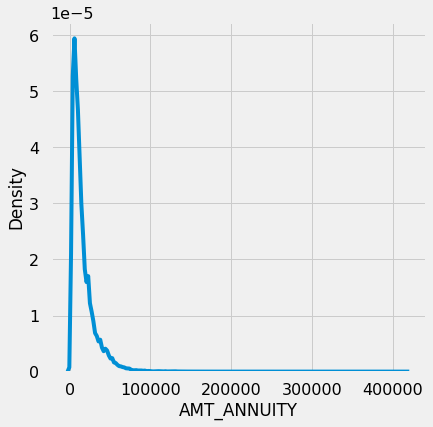

In [62]:
plt.figure(figsize=(6,6))
sns.kdeplot(Previous_Application['AMT_ANNUITY'])
plt.show()

In [63]:
Previous_Application['AMT_ANNUITY'].fillna(Previous_Application['AMT_ANNUITY'].median(),inplace = True)

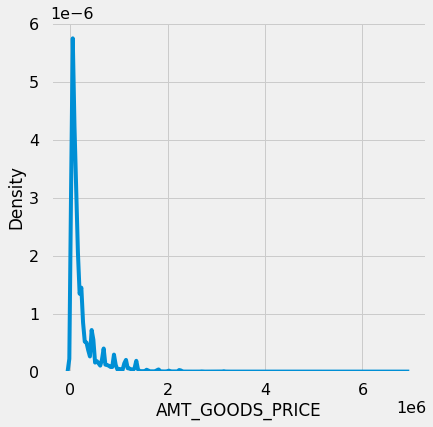

In [64]:
plt.figure(figsize=(6,6))
sns.kdeplot(Previous_Application['AMT_GOODS_PRICE'][pd.notnull(Previous_Application['AMT_GOODS_PRICE'])])
plt.show()

In [65]:
Previous_Application['AMT_GOODS_PRICE'].fillna(Previous_Application['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [66]:
Previous_Application.loc[Previous_Application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [67]:
Previous_Application['CNT_PAYMENT'].fillna(0,inplace = True)

#  Identifying the outliers

***A. Finding outlier information in Application_Data***

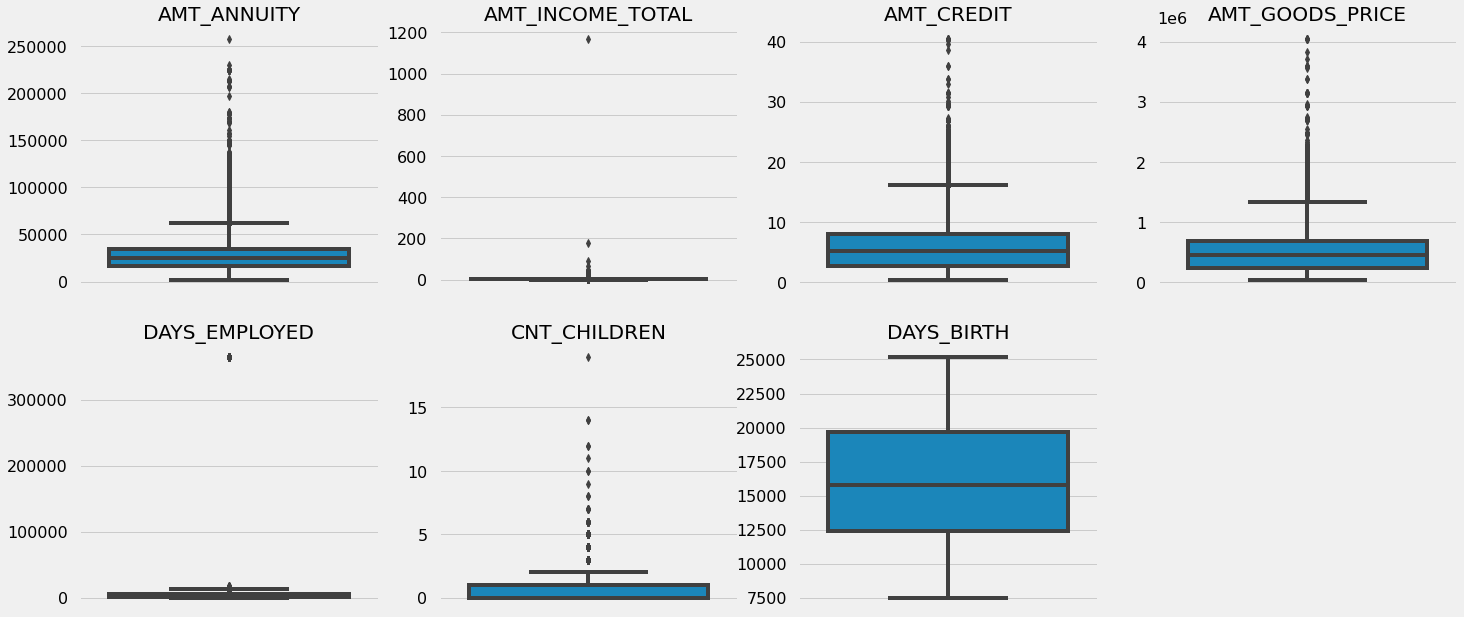

In [68]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Application_Data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Application_Data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

***Insight:***
    
    1. AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

    2. AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income compared to the others.

    3. DAYS_BIRTH has no outliers which means the data available is reliable.

    4. DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this is an incorrect entry. 

In [69]:
Application_Data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,236005.000000,236015.000000,236015.000000,2.358200e+05,236015.000000,236015.000000,236015.000000
mean,27117.545976,1.688216,5.989585,5.383243e+05,16034.549774,0.416829,67701.469110
std,14505.968888,2.636859,4.021289,3.691604e+05,4370.464212,0.722266,139425.495711
min,1980.000000,0.256500,0.450000,4.500000e+04,7489.000000,0.000000,0.000000
25%,16537.500000,1.125000,2.700000,2.385000e+05,12402.000000,0.000000,931.000000
50%,24916.500000,1.440000,5.135310,4.500000e+05,15747.000000,0.000000,2219.000000
75%,34627.500000,2.025000,8.086500,6.795000e+05,19684.000000,1.000000,5703.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25201.000000,19.000000,365243.000000



***2. Finding outlier information in Previous_Application***

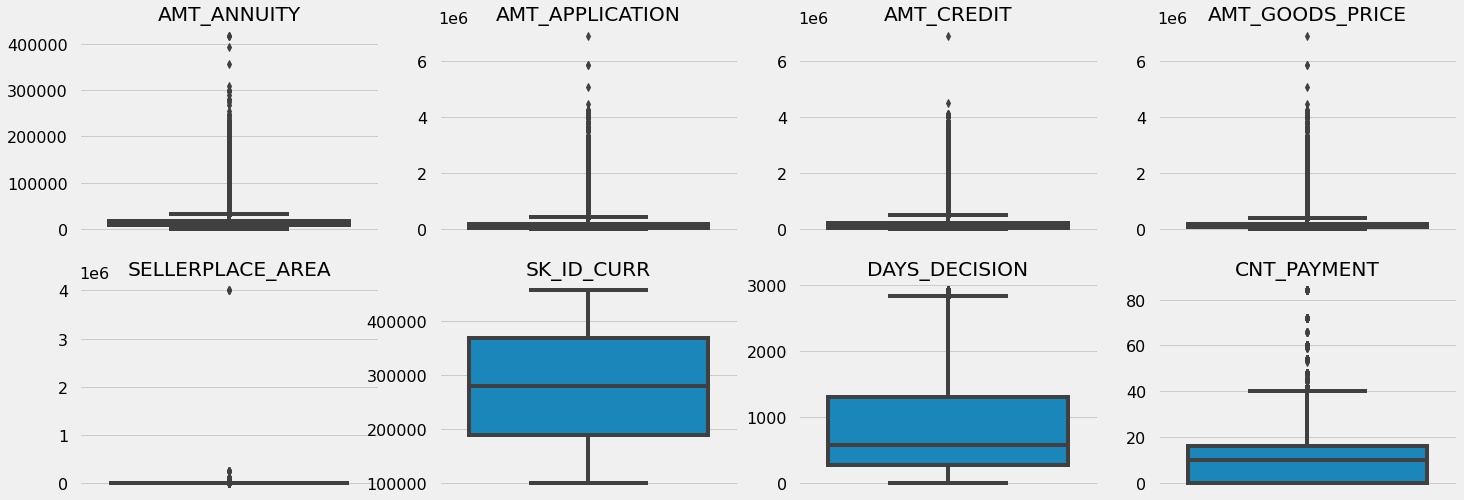

In [70]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=Previous_Application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=Previous_Application[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

***Insight:***

    1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.

    2. CNT_PAYMENT has few outlier values.

    3. SK_ID_CURR is an ID column and hence no outliers.

    4. DAYS_DECISION has few number of outliers indicating that these previous applications decisions were taken long back. 

In [71]:
Previous_Application[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


### Data Imbalance

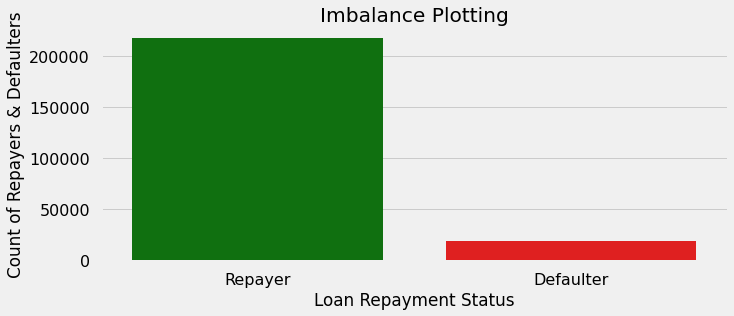

In [72]:
Imbalance = Application_Data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [73]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.90 and 8.10
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.34 : 1 (approx)


### Plotting Functions

***Following are the common functions customized to perform uniform anaysis that is called for all plots:***


In [74]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = Application_Data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = Application_Data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,13))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=Application_Data,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [75]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [76]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=Application_Data, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [77]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    
    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [78]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])


### Univariate Analysis :


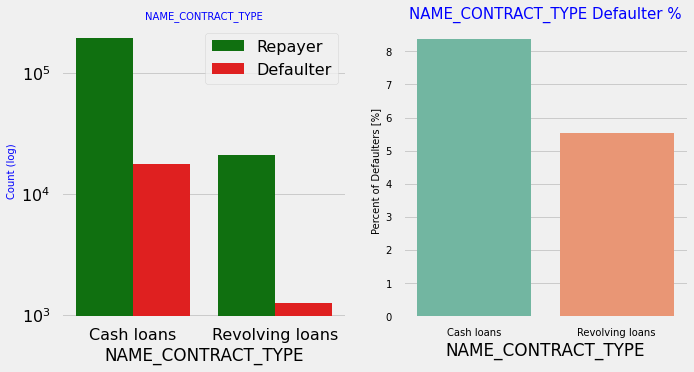

In [79]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

***Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.*** 

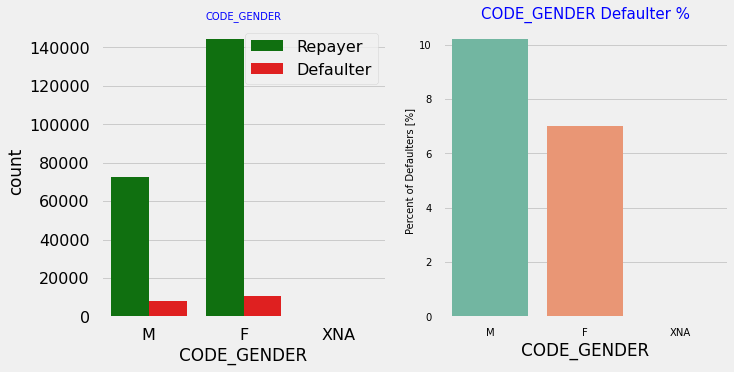

In [80]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

***The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (7%)***

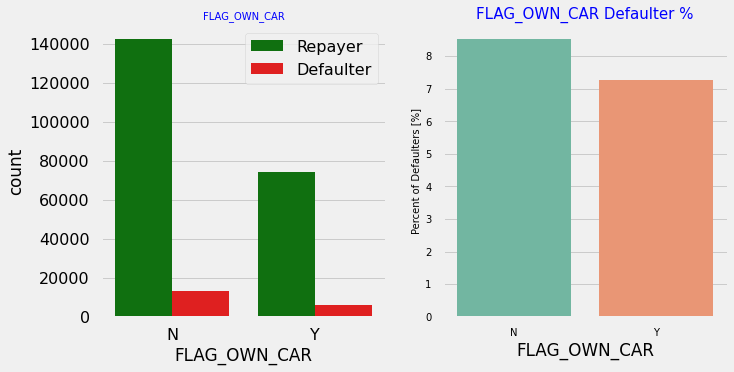

In [81]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

***Insights: Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.*** 

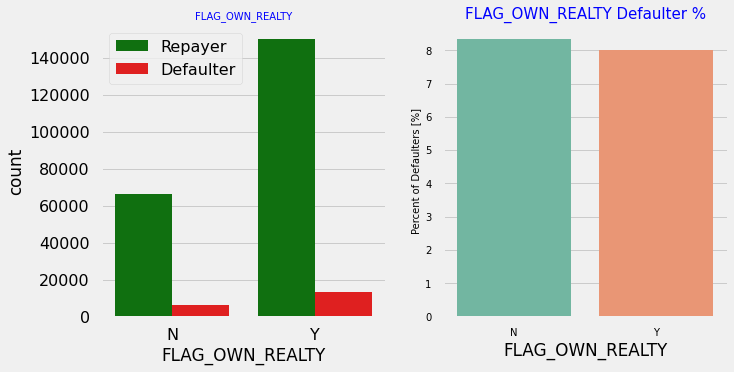

In [82]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

***Insights: The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.*** 

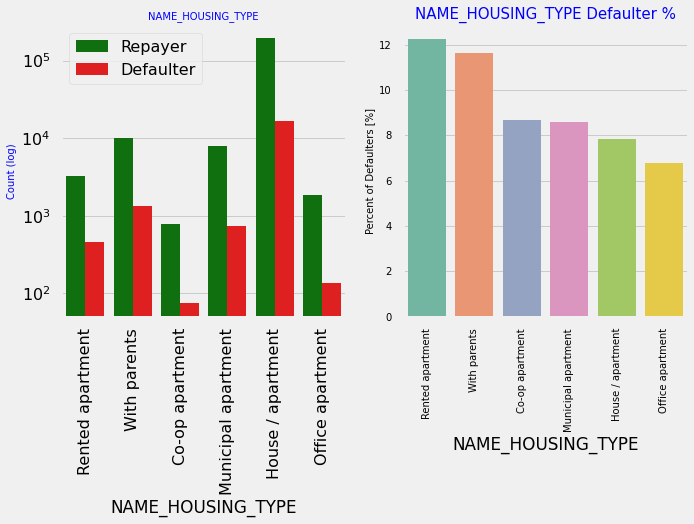

In [83]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

***Inferences:***

    Majority of people live in House/apartment
    People living in office apartments have lowest default rate
    People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

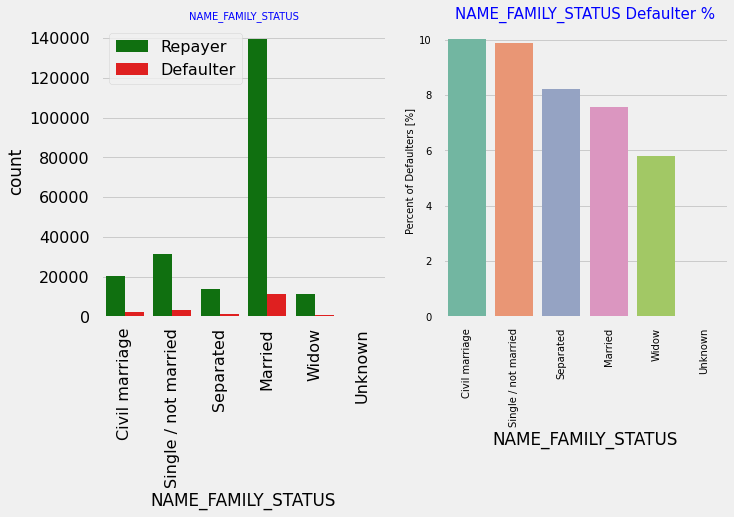

In [84]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

***Inferences:***

    Most of the people who have taken loan are married, followed by Single/not married and civil marriage
    In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).


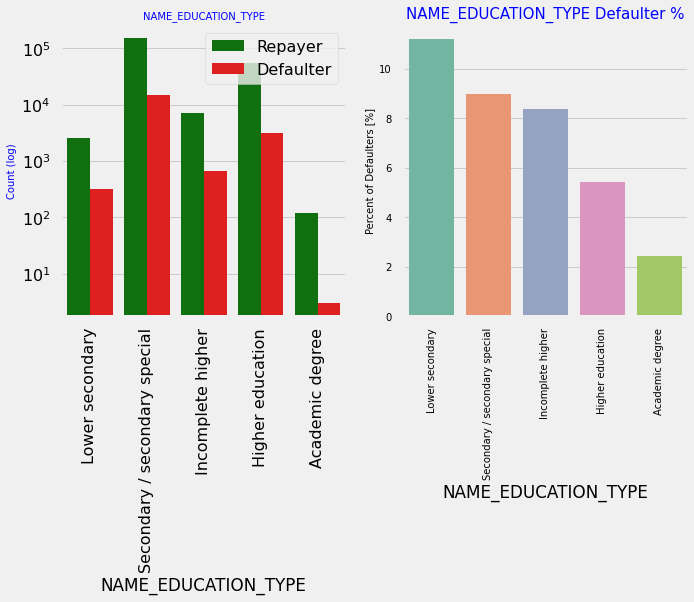

In [85]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

***Inferences:***

    Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
    The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.


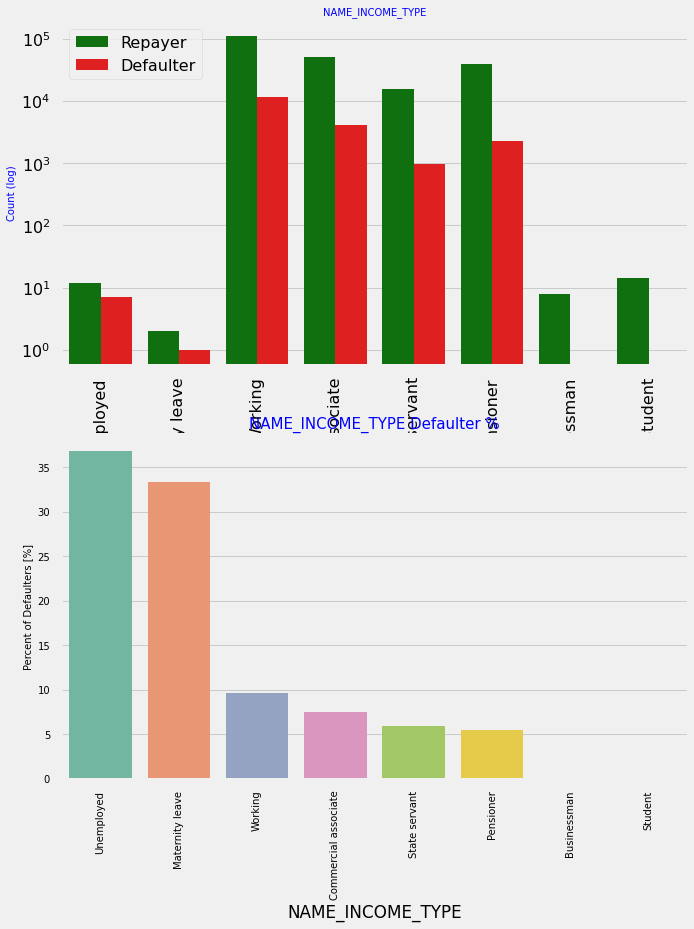

In [86]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

***Inferences:***

    1. Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
    2. The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
    3. Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan

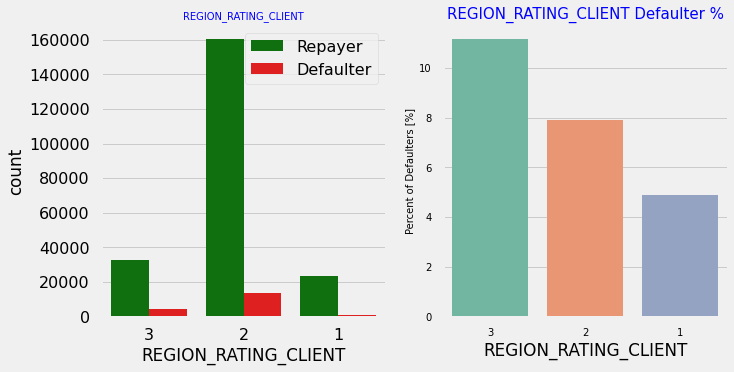

In [87]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

***Inferences:***

    1. Most of the applicants are living in Region_Rating 2 place.
    2. Region Rating 3 has the highest default rate (11%)
    3. Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans


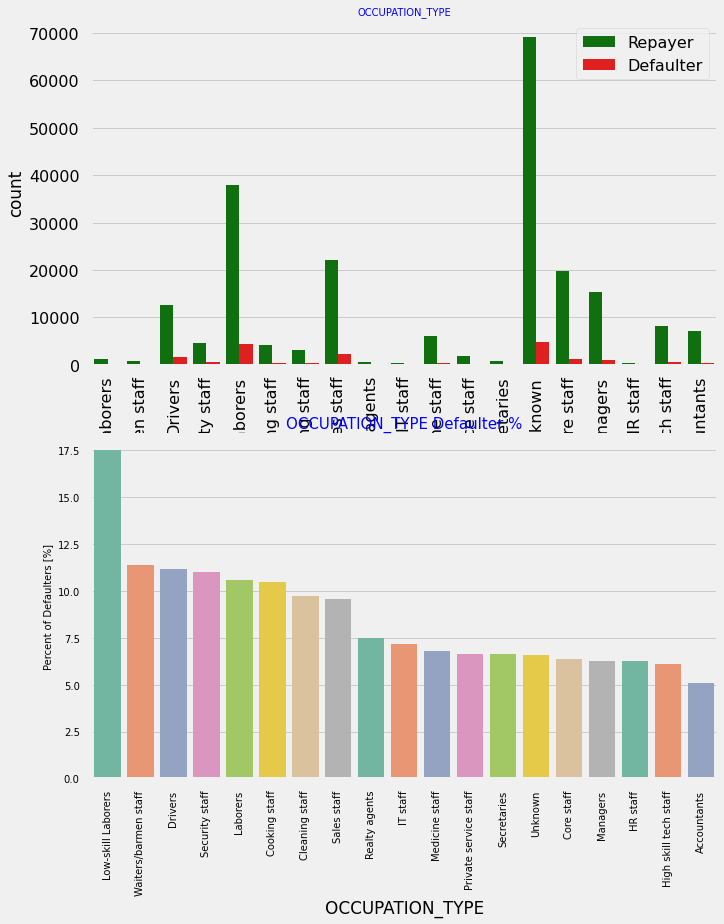

In [88]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

***Inferences:***

    1. Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
    2. The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

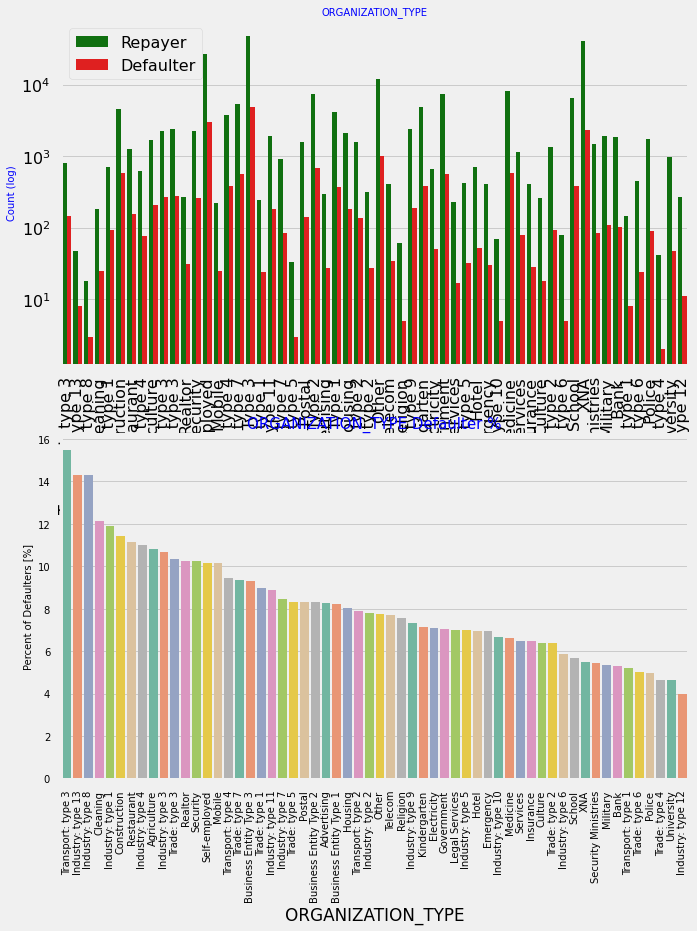

In [89]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

***Inferences:***

    1. Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
    2. Most of the people application for loan are from Business Entity Type 3
    3. For a very high number of applications, Organization type information is unavailable(XNA)

**It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:**
    Trade Type 4 and 5
    Industry type 8

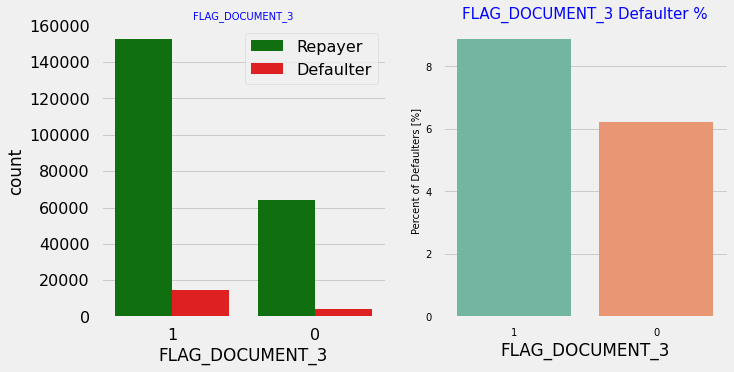

In [90]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

**There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)**

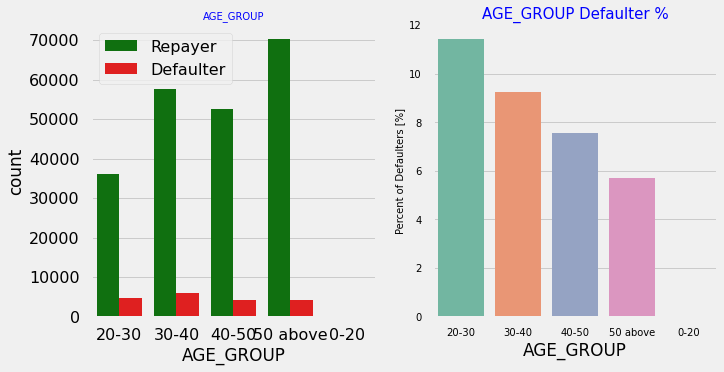

In [91]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

***Inferences:***

    1. People in the age group range 20-40 have higher probability of defaulting
    2. People above age of 50 have low probability of defailting


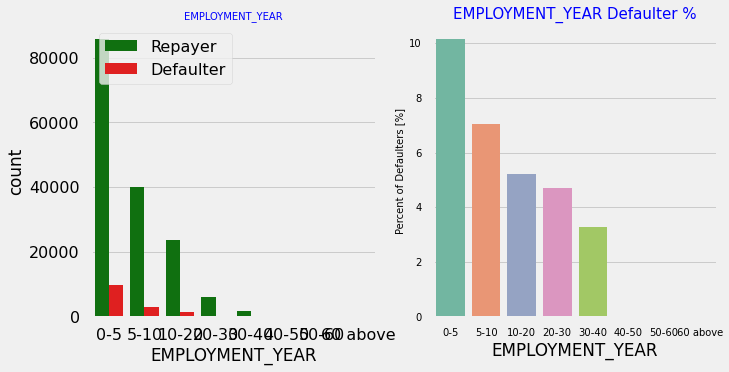

In [92]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

***Inferences:***

    1. Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%
    2. With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate



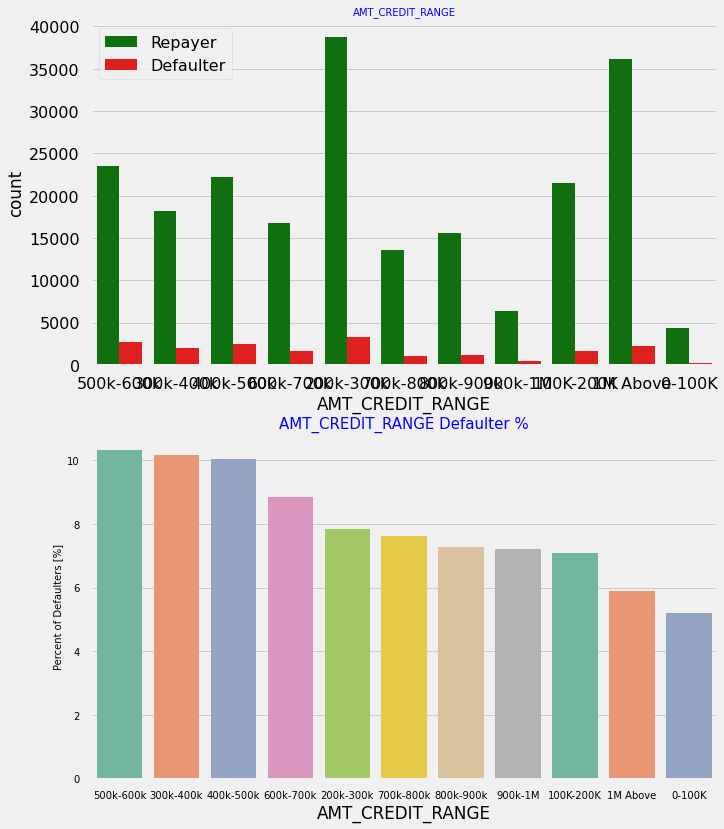

In [93]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

**Inferences:**

    1. More than 80% of the loan provided are for amount less than 900,000
    2. People who get loan for 300-600k tend to default more than others.



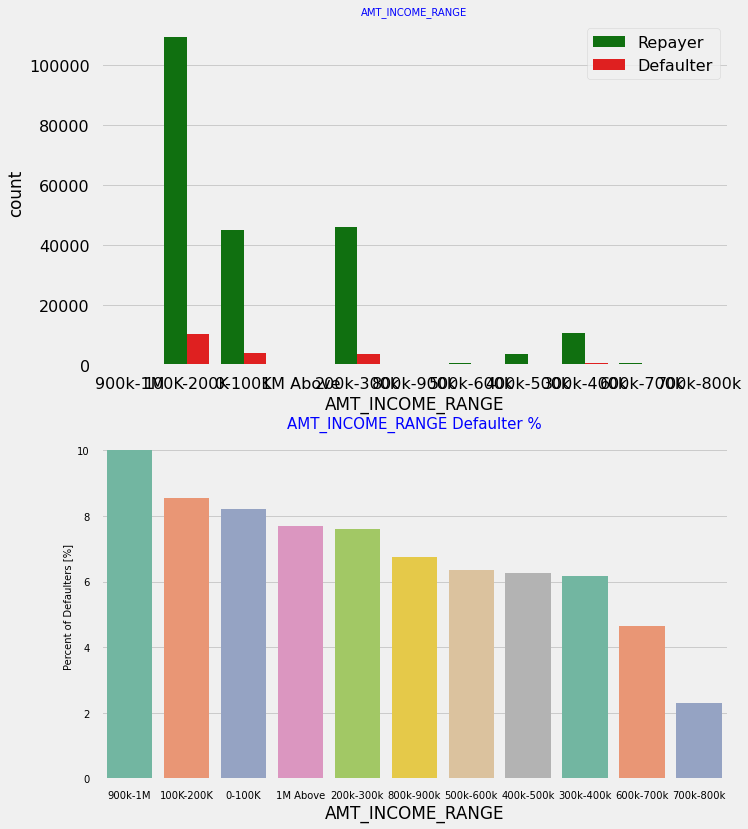

In [94]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

**Inferences:**

    1. 90% of the applications have Income total less than 300,000
    2. Application with Income less than 300,000 has high probability of defaulting
    3. Applicant with Income more than 700,000 are less likely to default



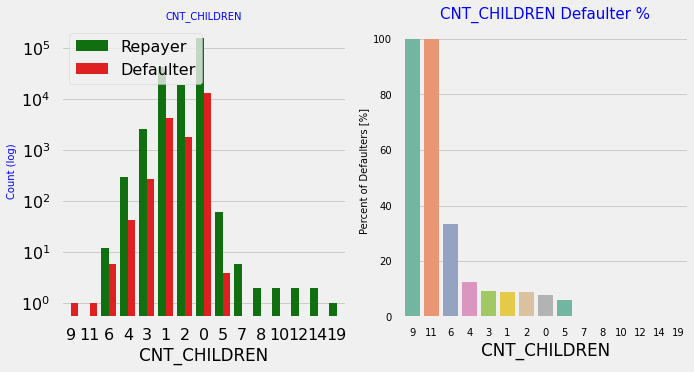

In [95]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

**Inferences:**

   1. Most of the applicants do not have children
   2. Very few clients have more than 3 children.
   3. Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate. 

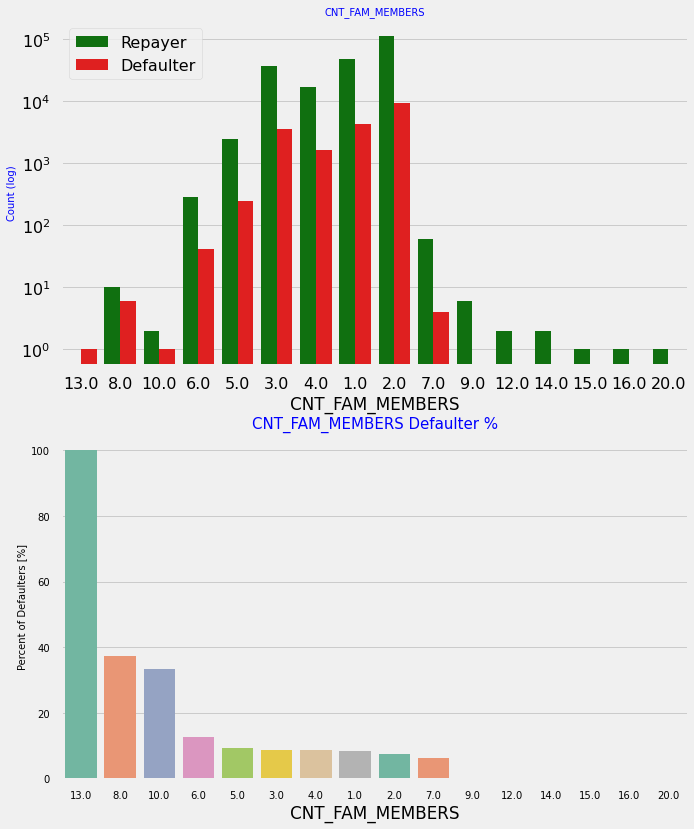

In [96]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

*Family member follows the same trend as children where having more family members increases the risk of defaulting*

### Bivariate Analysis

In [97]:
Application_Data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,8.0,7.650000,6.582932,1.8000,3.93750,6.0750,9.000,22.5000
Commercial associate,54909.0,2.027072,1.453371,0.2700,1.35000,1.8000,2.250,180.0009
Maternity leave,3.0,1.875000,1.531543,0.6750,1.01250,1.3500,2.475,3.6000
Pensioner,42474.0,1.363057,0.773905,0.2565,0.90000,1.1700,1.665,22.5000
State servant,16643.0,1.800336,0.976675,0.2700,1.12500,1.5750,2.250,18.9000
Student,14.0,1.828929,1.174996,0.9000,1.18125,1.6425,1.800,5.6250
Unemployed,19.0,1.114105,0.943865,0.2655,0.49500,0.6300,1.350,3.3750
Working,121945.0,1.633266,3.474009,0.2565,1.12500,1.3500,2.025,1170.0000


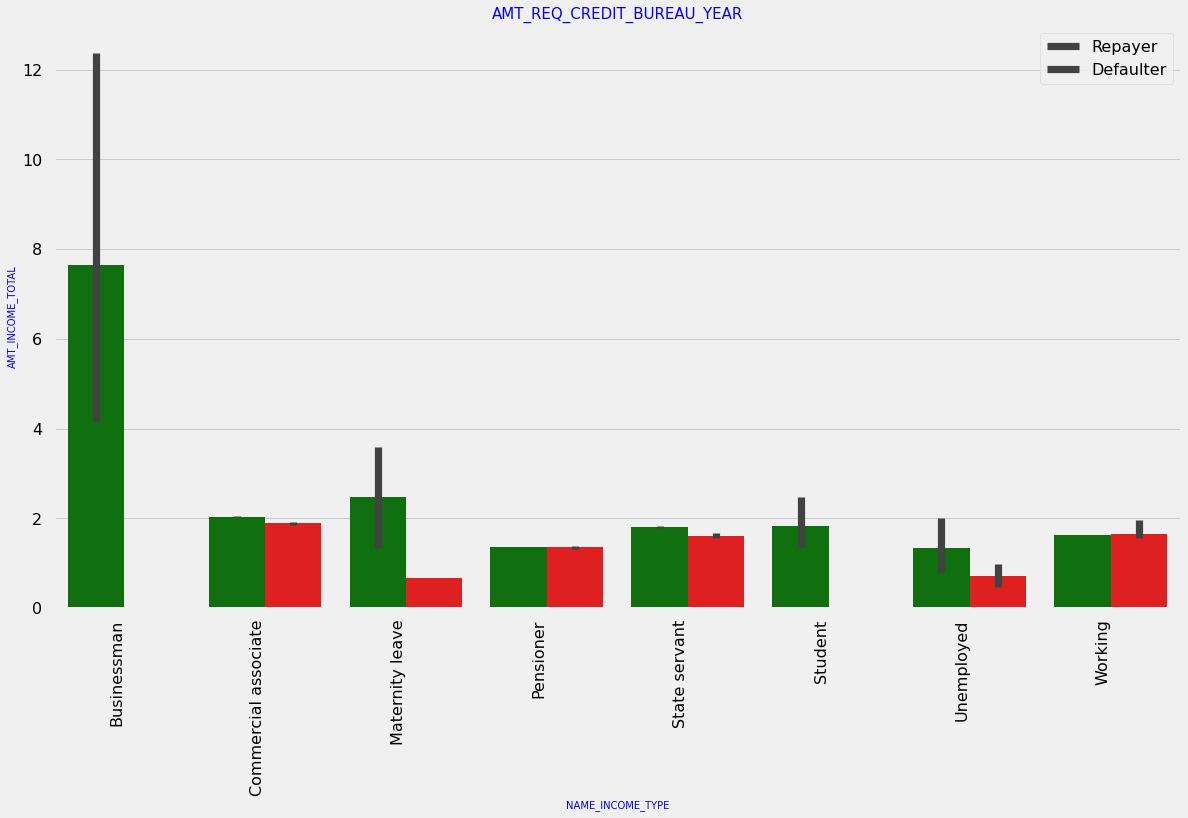

In [98]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",Application_Data,"TARGET",(18,10))

**Inferences:**

It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs.


### Correlation Analysis

In [99]:
Application_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [100]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
corr_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = Application_Data.loc[Application_Data['TARGET']==0, corr_cols] # Repayers
Defaulter_df = Application_Data.loc[Application_Data['TARGET']==1, corr_cols] # Defaulters

In [101]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987210
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878924
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776710
71,AMT_ANNUITY,AMT_CREDIT,0.771229
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626188
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.422011
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.351489
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.344605
138,DAYS_BIRTH,CNT_CHILDREN,0.336504
190,DAYS_REGISTRATION,DAYS_BIRTH,0.331623


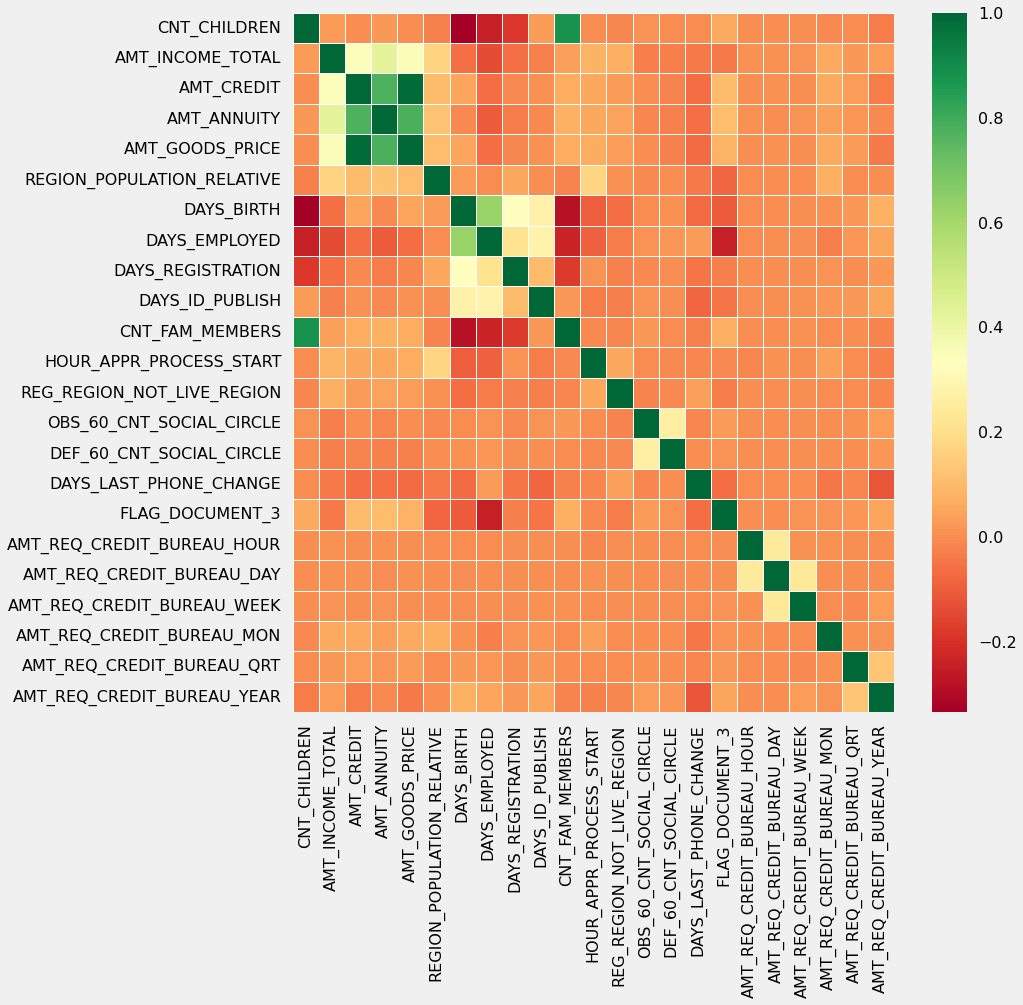

In [102]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

*Credit amount is highly correlated with*

    amount of goods price
    loan annuity
    total income

*We can also see that repayers have high correlation in number of days employed.*

In [103]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983075
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885481
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.750342
71,AMT_ANNUITY,AMT_CREDIT,0.749261
167,DAYS_EMPLOYED,DAYS_BIRTH,0.581947
190,DAYS_REGISTRATION,DAYS_BIRTH,0.288150
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.269503
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.266984
138,DAYS_BIRTH,CNT_CHILDREN,0.261303
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.256620


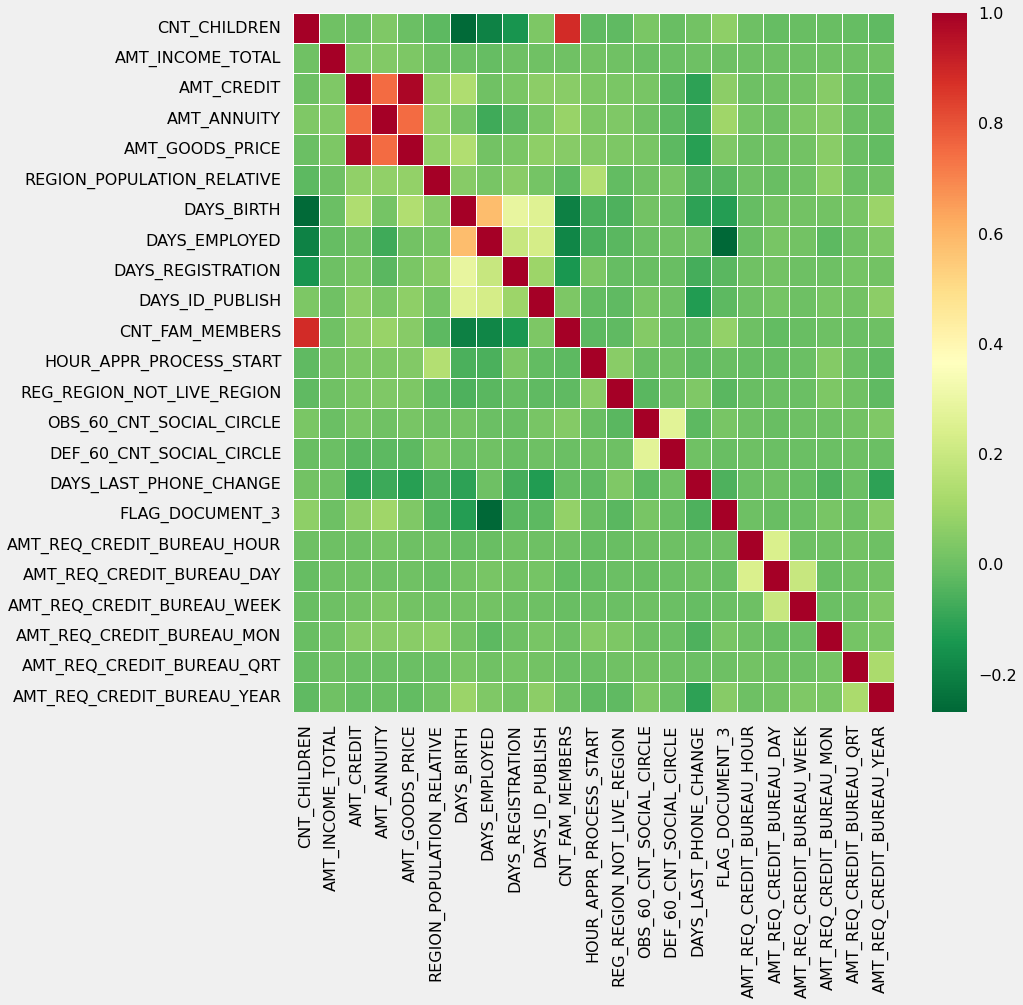

In [104]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn_r",annot=False,linewidth =1)

**Inferences:**

   1. Credit amount is highly correlated with amount of goods price which is same as repayers.

   2. But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)

   3. We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).

   4. There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.

   5. Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.

   6. There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)


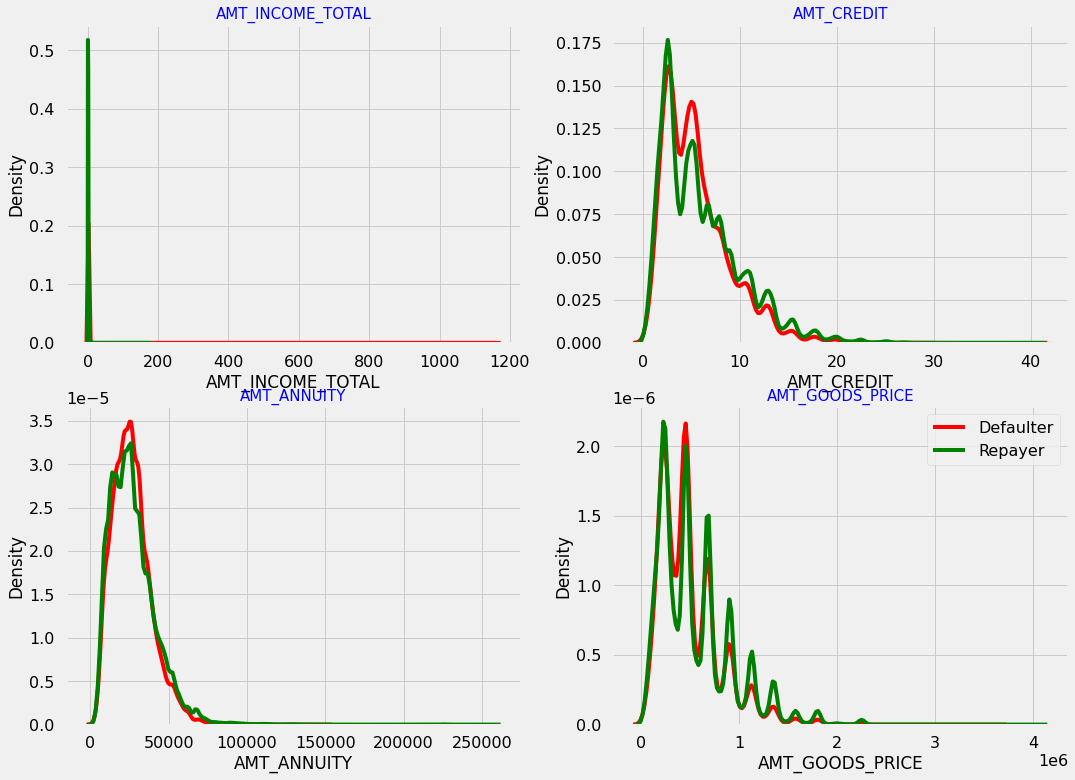

In [105]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = Application_Data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

**Inferences:**

   1. Most no of loans are given for goods price below 10 lakhs

   2. Most people pay annuity below 50000 for the credit loan

   3. Credit amount of the loan is mostly less then 10 lakhs

   4. The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision


<Figure size 1080x432 with 0 Axes>

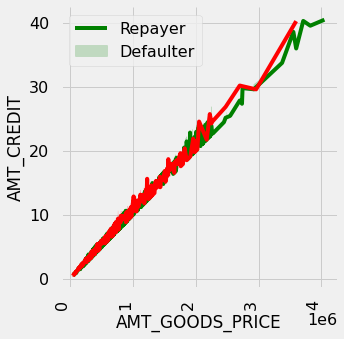

In [106]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',Application_Data,"TARGET", "line", ['g','r'], False,(15,6))



*When the credit amount goes beyond 3M, there is an increase in defaulters.*


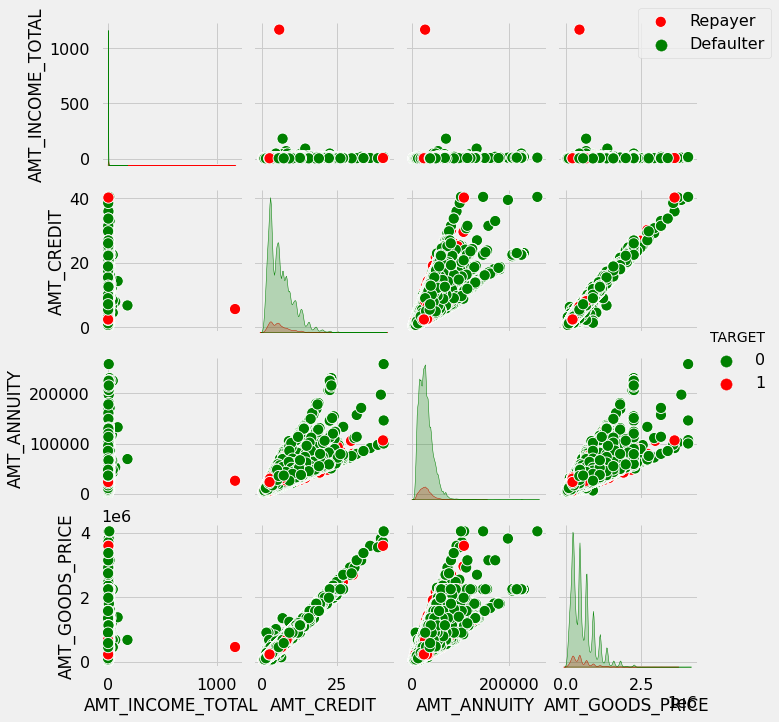

In [107]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = Application_Data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

**Inferences:**

   1. When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters

   2. AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line

   3. There are very less defaulters for AMT_CREDIT >3M

   4. Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section


### Merged Dataframes Analysis 

In [108]:
#joining both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(Application_Data, Previous_Application, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [109]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1082879, 74)

In [110]:
# Checking the element count of the dataframe
loan_process_df.size

80133046

In [111]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082879 entries, 0 to 1082878
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1082879 non-null  int64   
 1   TARGET                       1082879 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1082879 non-null  category
 3   CODE_GENDER                  1082879 non-null  category
 4   FLAG_OWN_CAR                 1082879 non-null  category
 5   FLAG_OWN_REALTY              1082879 non-null  category
 6   CNT_CHILDREN                 1082879 non-null  int64   
 7   AMT_INCOME_TOTAL             1082879 non-null  float64 
 8   AMT_CREDIT_x                 1082879 non-null  float64 
 9   AMT_ANNUITY_x                1082803 non-null  float64 
 10  AMT_GOODS_PRICE_x            1082033 non-null  float64 
 11  NAME_TYPE_SUITE              1082879 non-null  category
 12  NAME_INCOME_TYPE            

In [112]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06,1.082803e+06,1.082033e+06,1.082879e+06,1.082879e+06,1.082879e+06,...,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06,1.082879e+06
mean,2.369178e+05,8.674284e-02,4.058237e-01,1.730716e+00,5.874872e+00,2.702197e+04,5.275617e+05,2.073703e-02,1.631613e+04,7.262228e+04,...,4.420064e+01,1.984371e+02,1.922825e+06,1.482917e+04,1.751355e+05,1.962341e+05,1.853100e+05,8.808829e+02,3.082344e+02,1.257005e+01
std,7.897279e+04,2.814580e-01,7.185926e-01,2.180705e+00,3.845350e+00,1.393927e+04,3.527990e+05,1.334645e-02,4.351533e+03,1.433056e+05,...,1.192022e+01,3.925508e+02,5.325582e+05,1.316177e+04,2.936731e+05,3.195348e+05,2.881898e+05,7.836324e+02,5.673744e+03,1.448051e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.980000e+03,4.500000e+04,5.330000e-04,7.489000e+03,0.000000e+00,...,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-1.000000e+00,0.000000e+00
25%,1.685625e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.683000e+04,2.385000e+05,1.003200e-02,1.272600e+04,1.042000e+03,...,3.400000e+01,2.000000e+00,1.461552e+06,7.395480e+03,1.980000e+04,2.493000e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.370170e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.493900e+04,4.500000e+05,1.885000e-02,1.603900e+04,2.403000e+03,...,4.300000e+01,6.000000e+00,1.922905e+06,1.125000e+04,7.091145e+04,8.054550e+04,7.092000e+04,5.830000e+02,4.000000e+00,1.000000e+01
75%,3.053370e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.086500e+00,3.457800e+04,6.795000e+05,2.866300e-02,1.998100e+04,6.309000e+03,...,5.400000e+01,1.700000e+01,2.383974e+06,1.672895e+04,1.800000e+05,2.156400e+05,1.800000e+05,1.314000e+03,8.500000e+01,1.800000e+01
max,3.733720e+05,1.000000e+00,1.900000e+01,1.170000e+03,4.050000e+01,2.250000e+05,4.050000e+06,7.250800e-02,2.520100e+04,3.652430e+05,...,6.900000e+01,1.000000e+03,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.922000e+03,4.000000e+06,8.400000e+01


In [113]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

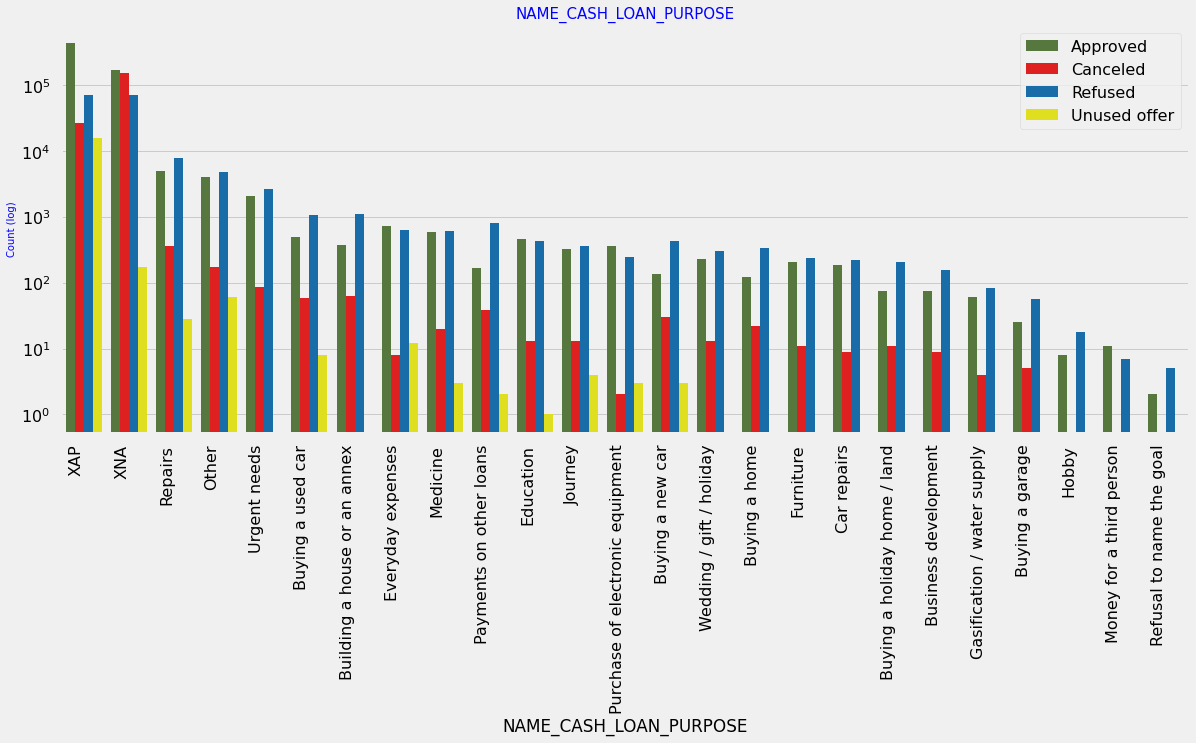

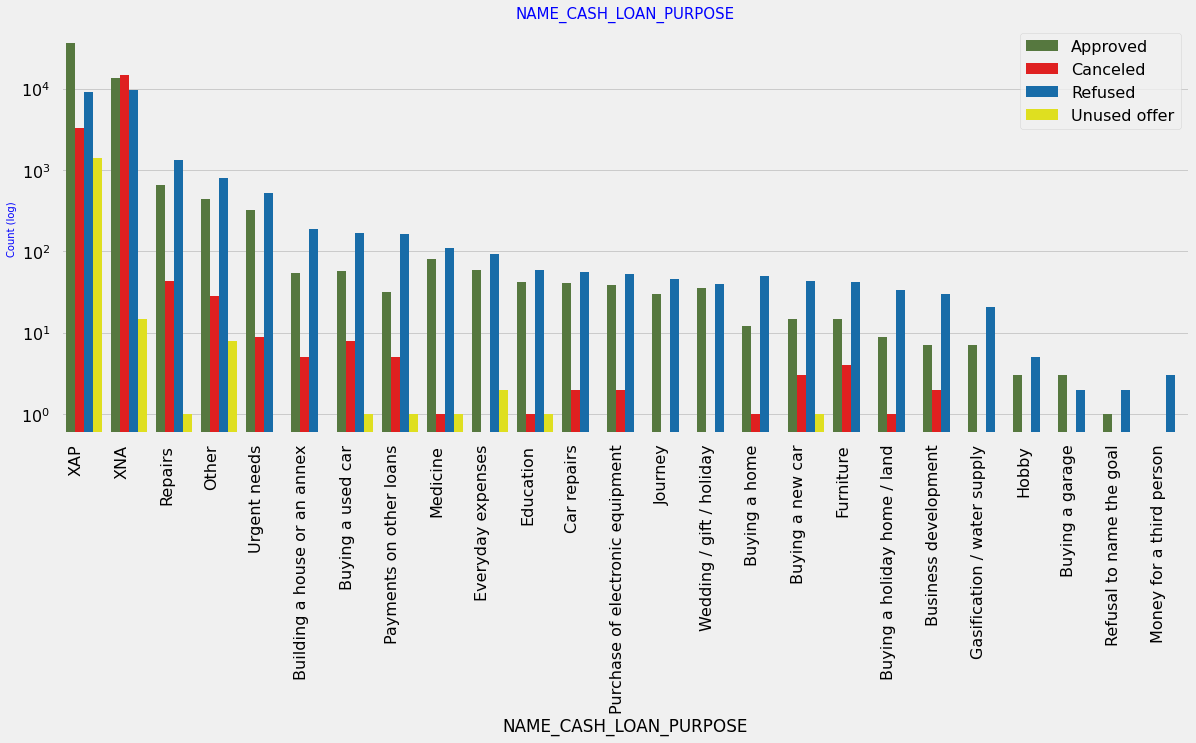

In [114]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

**Inferences:**

   1. Loan purpose has high number of unknown values (XAP, XNA)

   2. Loan taken for the purpose of Repairs seems to have highest default rate

   3. A very high number application have been rejected by bank or refused by client which has purpose as repair or other.

   4. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.


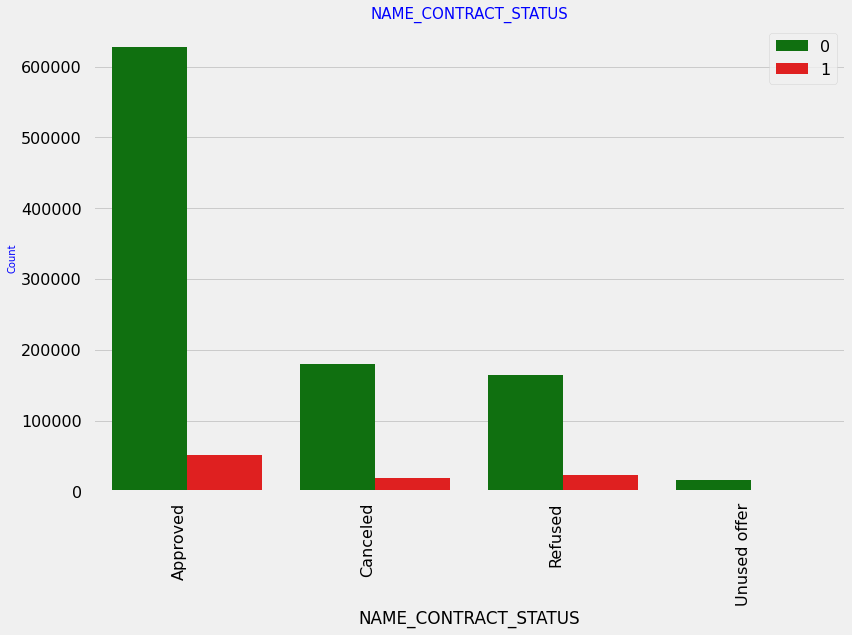

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       627837      92.4%
                     1        51642       7.6%
Canceled             0       180233     90.81%
                     1        18249      9.19%
Refused              0       164942     87.95%
                     1        22595     12.05%
Unused offer         0        15935     91.68%
                     1         1446      8.32%


In [115]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

**Inferences:**

   1. 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients

   2. 88% of the clients who have been previously refused a loan has payed back the loan in current case.

   3. Refusal reason should be recorded for further analysis as these clients would turn into potential repaying customer

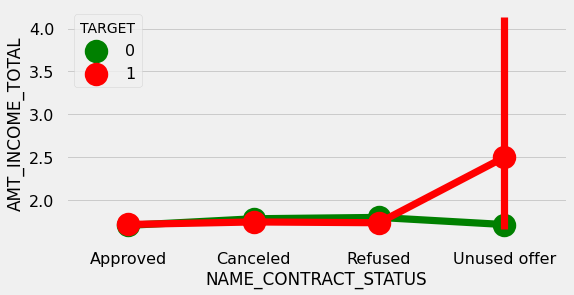

In [116]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

**The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others**

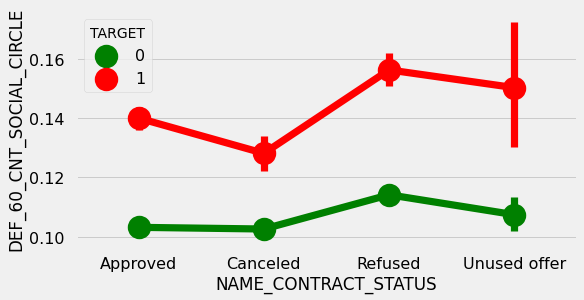

In [117]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

**Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.**

#                                                THE END
#                                          THANKING YOU